<a href="https://colab.research.google.com/github/KrishnaSreekumar/FeynnLabsProjetcs/blob/main/FastFoodSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

McDonalds Case Study

Step 1: Deciding (not) to segment


McDonalds is a leading fastfood company that caters to a wide market. It is important for them to cater to different needs of different groups of people.

Step 2: Specifying the Ideal Target Segment

the following attractiveness criteria will be used: liking McDonald’s and frequently eating at McDonald’s

Step 3: Collecting Data

Attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING.



Step 4:

Exploring Data

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import pdist
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from sklearn import preprocessing

In [30]:
mcd = pd.read_csv('/mcdonalds.csv')

In [5]:
#dim() in R is shape in Python Pandas
mcd.shape

(1453, 15)

In [6]:
mcd.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


YES and NO is not a suitable format for segment extraction. We need numbers, not words. To get numbers, we store the segmentation variables in a separate matrix, and convert them from verbal YES/NO to numeric binary.

In [9]:
Md_x = mcd.iloc[:, 0:11].values
#iloc[:, 0:11] selects all rows (:) and the first 11 columns (0:11) of the mcdonalds data frame. 
#Then, the values attribute is used to convert the resulting data frame subset to a NumPy array, which can be used as a matrix in Python. 
#The resulting matrix is assigned to the variable MD_x.

In [10]:
Md_x = np.where(Md_x == "Yes", 1, 0)
# np.where() function is used to replace all occurrences of "Yes" with 1 and "No" with 0 in the MD_x matrix. 
#The resulting binary matrix is then assigned back to the same variable MD_x.

In [12]:
col_means = np.mean(Md_x, axis=0)
col_means_rounded = np.round(col_means, 2)
# np.mean() function is used to calculate the column means of the MD_x matrix along the axis=0. 
#The resulting column means are then rounded to two decimal places using the np.round() function with the decimals=2 argument. 
#The rounded column means are assigned to the variable col_means_rounded.

In [14]:
pca = PCA()
Md_pca = pca.fit_transform(Md_x)
#the PCA() function from the Scikit-learn library is used to create a PCA object. 
#Then, the fit_transform() method is used to fit the PCA model to the MD_x matrix and transform the data into the principal components.
# The resulting transformed matrix is assigned to the variable MD_pca.

In [17]:
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [18]:
print(np.around(pca.components_, decimals=1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


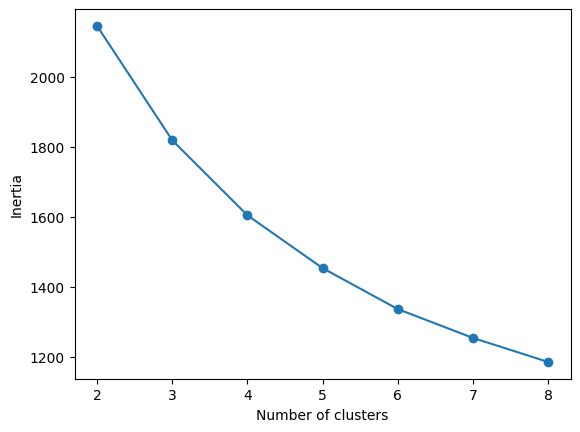

In [22]:
np.random.seed(1234)

inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Md_x)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters

plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Cluster the data using the optimal number of clusters
n_clusters = 3 # Example
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(Md_x)
labels = kmeans.labels_

# Relabel the clusters
unique_labels = np.unique(labels)
for i, label in enumerate(unique_labels):
    labels[labels == label] = i


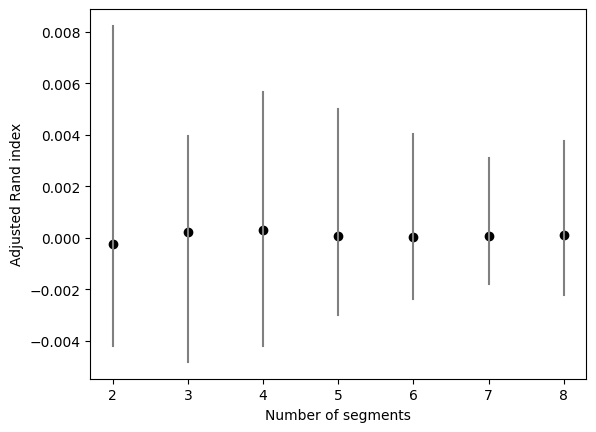

In [26]:
np.random.seed(1234)

n_bootstraps = 100
inertia_dict = {}

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Md_x)
    inertia_dict[k] = kmeans.inertia_

ari_dict = {}
for bootstrap in range(n_bootstraps):
    # Generate a bootstrap sample of the data
    bootstrap_sample = resample(Md_x, replace=True, random_state=bootstrap)

    for k in range(2, 9):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(bootstrap_sample)
        labels_pred = kmeans.labels_
        labels_true = kmeans.predict(Md_x)

        # Calculate the adjusted Rand index
        ari = adjusted_rand_score(labels_true, labels_pred)

        if k not in ari_dict:
            ari_dict[k] = [ari]
        else:
            ari_dict[k].append(ari)

# Plot the results
plt.figure()
for k in range(2, 9):
    plt.plot(k, np.mean(ari_dict[k]), 'o', color='black')
    plt.plot([k, k], [np.min(ari_dict[k]), np.max(ari_dict[k])], '-', color='grey')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.show()

In [28]:
MD_vclust = linkage(pdist(Md_x.T))

In [34]:
def wss(X, k):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    return sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))**2

# Apply K-means clustering to MD_x for 2 to 8 clusters
k_range = range(2, 9)
wss_scores = [wss(Md_x, k) for k in k_range]

# Find the number of clusters with the smallest within-cluster sum of squares
n_clusters = np.argmin(wss_scores) + 2

# Compute the K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans.fit(Md_x)

# Relabel the clustering results
MD_k28 = kmeans.labels_


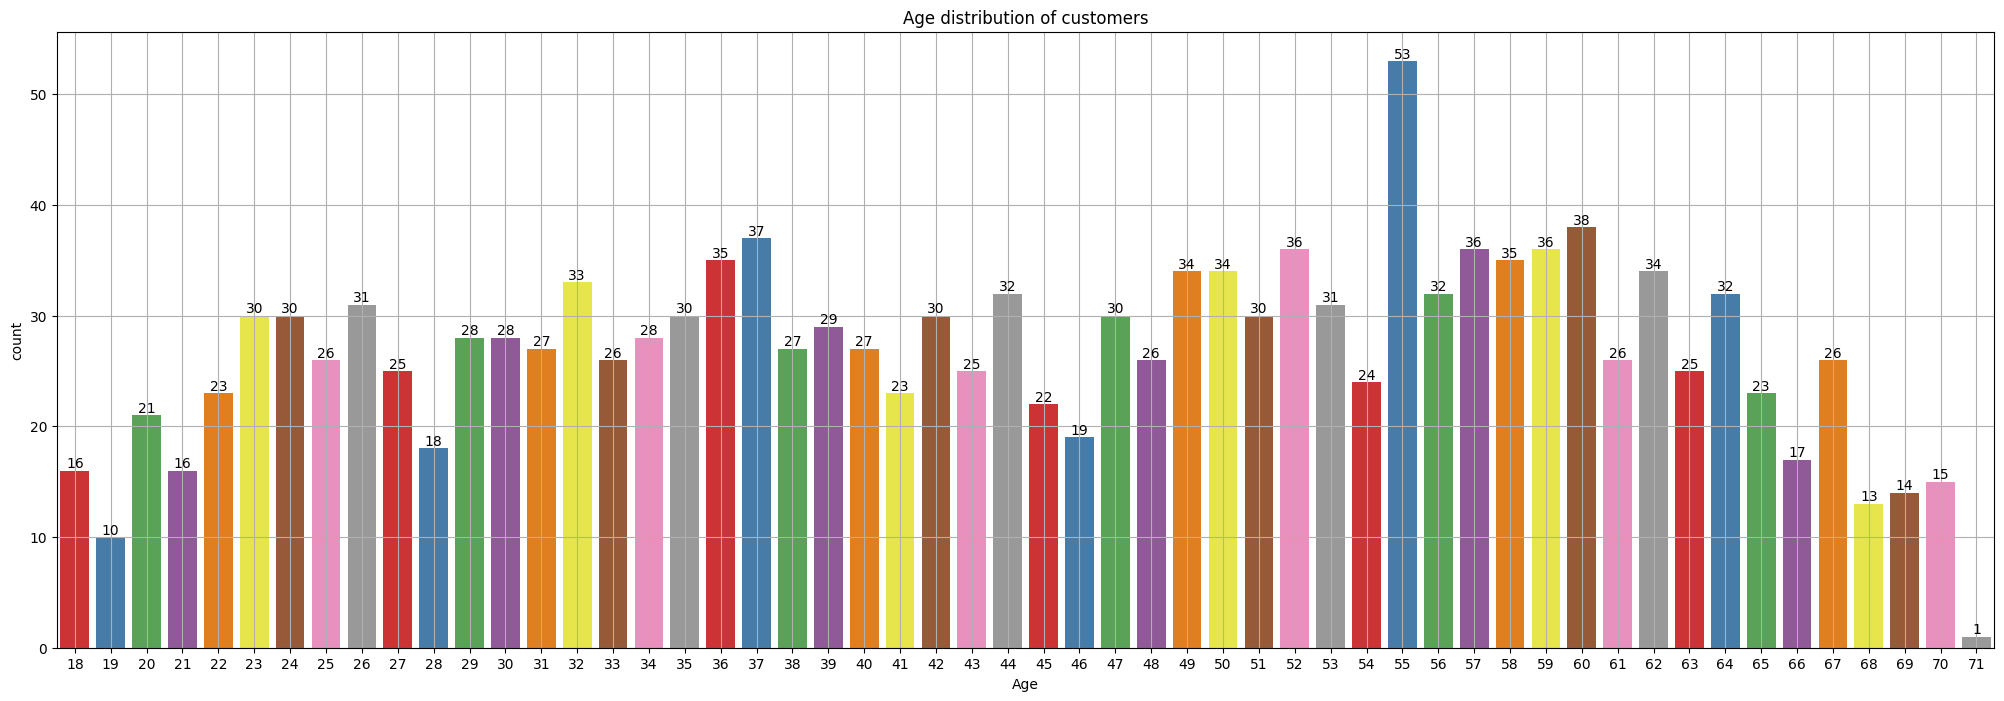

In [43]:
plt.rcParams['figure.figsize'] = (25, 8)
plot = sns.countplot(x=mcd['Age'],palette = 'Set1')
plot.bar_label(plot.containers[0])
plt.grid(True)
plt.title('Age distribution of customers')
plt.show()

In [54]:
pca_data = preprocessing.scale(Md_x)

pca = PCA(n_components=11)
pc = pca.fit_transform(Md_x)
names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
pf = pd.DataFrame(data = pc, columns = names)
round(pf,3)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(Md_x)
mcd['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


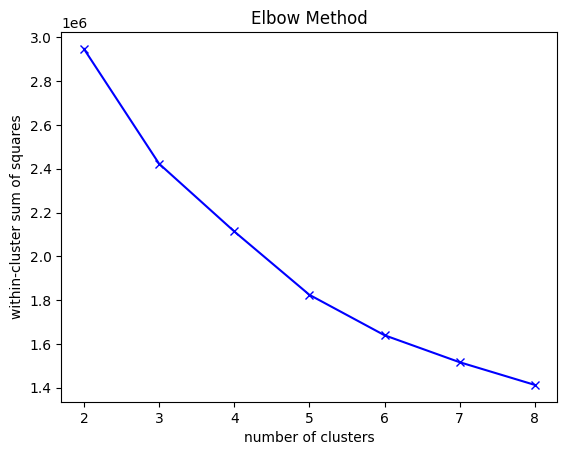

In [37]:
k_range = range(2, 9)

# Plot the within-cluster sum of squares as a function of the number of clusters
plt.plot(k_range, wss_scores, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

In [56]:
crosstab =pd.crosstab(mcd['cluster_num'],mcd['Like'])
crosstab = crosstab[['-4','-3','-2','-1','0','+1','+2','+3','+4']]
crosstab 

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,3,7,6,7,36,42,60,66,47
1,4,2,6,13,43,65,90,143,111
2,36,34,28,25,51,31,31,12,2
3,28,30,19,13,39,14,6,8,0
